In [67]:
import pandas as pd
df = pd.read_csv('movie_data_13527_fixed_binaries_inflation_adjusted.csv')

todrop = ['Rank', 'Movie Title', 'Theaters', 'Theaters.1', 'Genre', 'Studio', 'Close', 'Link', 'All Time Worldwide', 'All Time Domestic', 'Worldwide Yearly', 'Worldwide Yearly in Rating']
for entry in todrop:
    df.drop(entry, axis = 1, inplace = True)

df_small = df.copy()
df_small.dropna(axis = 0, inplace = True)

def dayofyear(datestr):
    datelist = datestr.split('/')
    m, d = int(datelist[0]), int(datelist[1])
    days = [31,29,31,30,31,30,31,31,30,31,30,31]
    return sum(days[:m-1]) + d

df_small.Open = df_small.Open.apply(dayofyear)

#df_small.drop([col for col, val in df_small.ilo.sum().iteritems() if val < 10], axis=1, inplace=True)

threshold = 150
# genres are 8:
df_smaller = df_small.copy()
colnames = df_smaller.columns
tokill = []
# backwards so don't change indices
for i in list(range(8,33)):
    if sum(df_small.iloc[:,i]) < threshold:
        tokill.append(colnames[i])
for entry in tokill:
    df_smaller.drop(entry, axis = 1, inplace = True)

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#sns.pairplot(df_smaller)

In [68]:
features = df_smaller.copy()

features['total'] = features['action']

for name in features.loc[:,'comedy':'scifi']:
    features['total'] = features['total'] + features[name]
#     total = total + X.loc[:,column]
#features = features[(features.total > 0)]
#features = features[(features.Year > 2002)]
features = features[(features.Rating < 3)]
features.drop('total', axis = 1, inplace = True)



In [69]:
# dom_gross, int_gross, budget = features.iloc[:,], features.iloc[:,4], features.iloc[:,5]
# int_roi, dom_roi, int_pct = int_gross/budget, dom_gross/budget, 100*int_gross/(dom_gross + int_gross)

In [70]:
y = features['International Gross (2016 dollars)']/features('Budget (2016 dollars)')
X = features.copy()
hitlist2 = ['Domestic Gross (2016 dollars)', 'International Gross (2016 dollars)', 'Opening']
for entry in hitlist2:
    X.drop(entry, axis = 1, inplace = True)
#X=X.loc[:,'Year':'Rating']
X=X.loc[:,['Rating', 'Budget (2016 dollars)']]
X.shape
y.shape


(1357,)

In [71]:
y

0        7.549033e+08
116      3.860533e+08
229      8.989241e+08
361      4.016429e+08
525      1.232242e+08
526      3.562738e+08
692      3.828832e+08
924      4.683630e+07
1091     3.195809e+08
1320     3.549677e+08
1323     2.143424e+08
1573     3.133317e+08
1574     5.419136e+08
1578     4.176843e+08
1813     3.550457e+08
1814     5.357040e+08
1815     4.463096e+08
1817     1.240369e+08
1818     1.459804e+08
1821     1.097178e+08
1822     2.054884e+08
1823     2.915889e+08
2040     3.960334e+08
2041     3.625906e+08
2043     9.680817e+07
2044     3.189389e+08
2045     1.372916e+08
2056     1.964828e+08
2284     4.918452e+08
2286     1.784001e+08
             ...     
13083    6.159969e+07
13084    4.867213e+07
13085    1.384756e+08
13087    6.528427e+07
13091    1.621415e+08
13093    1.908169e+07
13094    1.329001e+06
13097    2.584882e+07
13099    9.458109e+07
13100    1.733480e+07
13101    1.427444e+07
13102    9.628711e+06
13103    2.870073e+07
13104    5.362636e+07
13107    5

In [72]:
from sklearn import datasets, cross_validation, linear_model, grid_search
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cross_validation import cross_val_score, train_test_split, KFold


from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.grid_search import GridSearchCV

In [73]:
X_train, X_holdout, y_train, y_holdout = train_test_split(X,y, test_size=0.2)
kfold = KFold(len(X_train), n_folds=5, shuffle=True, random_state=0)

In [74]:
def build_grid_search_est(model, X, y, cv=5, **params):
    
    grid_est = GridSearchCV(model, param_grid=params, cv=cv)
    grid_est.fit(X, y)
    df = pd.DataFrame(grid_est.grid_scores_)
    for param in params:
        df[param] = df.parameters.apply(lambda val: val[param])
        plt.plot(np.log(df.alpha), df.mean_validation_score);
#         plt.semilogx(df.alpha, df.mean_validation_score)
    grid_est.grid_scores_
    return grid_est

In [75]:
lin_reg_est = LinearRegression()
lin_reg_est.fit(X_train, y_train);



Lasso Grid Search


//anaconda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:466: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)
//anaconda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:466: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)
//anaconda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:466: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)
//anaconda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:466: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)
//anaconda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:466: ConvergenceWarning: Objective did not converge. You might want to increase th

{'alpha': 1000000000.0}

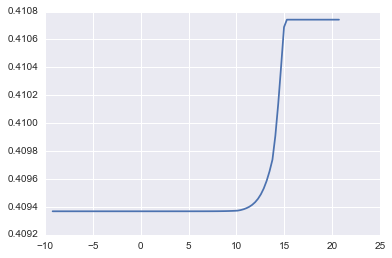

In [76]:
print("Lasso Grid Search")
lasso_grid_est = build_grid_search_est(Lasso(), X_train, y_train, cv=kfold,
                                       alpha=np.logspace(-4, 9, 100))


lasso_grid_est.best_params_

Ridge Grid Search


{'alpha': 1000000000.0}

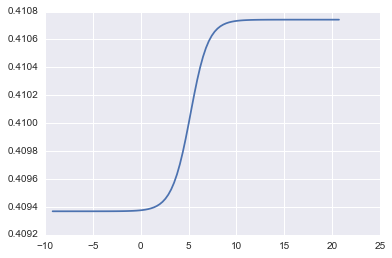

In [77]:
print("Ridge Grid Search")
ridge_grid_est = build_grid_search_est(Ridge(), X_train, y_train, cv=kfold,
                                       alpha=np.logspace(-4, 9, 100))

ridge_grid_est.best_params_

Elastic Net Grid Search


//anaconda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:466: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)
//anaconda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:466: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)
//anaconda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:466: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)
//anaconda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:466: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)
//anaconda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:466: ConvergenceWarning: Objective did not converge. You might want to increase th

{'alpha': 1000000000.0}

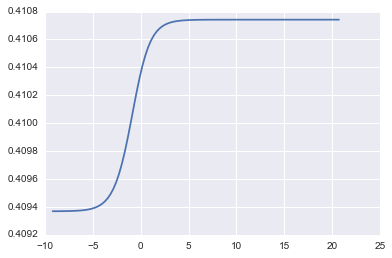

In [78]:
print("Elastic Net Grid Search")
elastic_net_grid_est = build_grid_search_est(ElasticNet(), X_train, y_train, cv=kfold,
                                       alpha=np.logspace(-4, 9, 100))


elastic_net_grid_est.best_params_

In [79]:
from sklearn.metrics import r2_score, mean_squared_error

y_pred = lin_reg_est.predict(X_holdout)
print("Linear Regression:", r2_score(y_holdout, y_pred))

y_pred = lasso_grid_est.predict(X_holdout)
print("Lasso Regression:", r2_score(y_holdout, y_pred))

y_pred = ridge_grid_est.predict(X_holdout)
print("Ridge Regression:", r2_score(y_holdout, y_pred))

y_pred = elastic_net_grid_est.predict(X_holdout)
print("ElasticNet Regression:", r2_score(y_holdout, y_pred))

Linear Regression: 0.48799722564
Lasso Regression: 0.485265861966
Ridge Regression: 0.485265873396
ElasticNet Regression: 0.485265856656


In [81]:
lin_reg_est.coef_

array([ -6.62446200e+06,   2.02011853e+00])